In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import shap

import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Load model
with open("test_model.pkl", "rb") as f:
    my_rf = pickle.load(f)

# Load X_test
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

# Load y_test
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

display(my_rf)
display(X_test.head())
display(y_test.head())

RandomForestRegressor(max_features='sqrt', n_estimators=1255, n_jobs=-1,
                      random_state=42)

,ntrees_1,dom_nr1_tree_class_ba_abs,ntrees_2,site_ba_prc_dead_at_v1,campagne_1,nincid_2_0,nincid_2_1,nincid_2_2,nincid_2_3,nincid_2_4,...,top3_species_67,top3_species_69,top3_species_7,top3_species_71,top3_species_72,top3_species_73,top3_species_74,top3_species_8,top3_species_9,top3_species_none
0,22,40.619663,22,0.008886,2014,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,40.080229,6,0.000000,2016,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10,50.126832,10,0.024328,2016,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,34.649818,17,0.024329,2010,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18,45.671131,18,0.000000,2013,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


330914    0.131515
389869    1.107448
385873    0.731161
189968    1.452607
264935    0.281614
Name: mort_ba_prc_yr_v1, dtype: float64

In [3]:
run_subset = True
n_rows = 2

if run_subset:
    subset_x = X_test.iloc[:n_rows, :]
    subset_y = y_test.iloc[:n_rows]
else:
    subset_x = X_test
    subset_y = y_test

**Problem**
Running my 8 variable model (including species models) even for only ten predictions takes a long time. I need to figure out how to speed this up.


***

In [20]:
# From here: https://stackoverflow.com/questions/71751251/get-waterfall-plot-values-of-a-feature-in-a-dataframe-using-shap-package

from sklearn.ensemble import RandomForestClassifier

# from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

explainer = TreeExplainer(my_rf)
sv = explainer(X_test)
exp = Explanation(
    sv.values[:, :, 1],
    sv.base_values[:, 1],
    data=X_test.values,
    feature_names=X_test.columns,
)
idx = 0
waterfall(exp[idx])

In [5]:
explainer = shap.TreeExplainer(my_rf)
shap_values = explainer.shap_values(X_test, approximate=True)

In [17]:
shap_values[0]

array([-2.29179505e-01, -8.76909965e-02, -1.85134126e-01, -1.49884573e-01,
       -6.51462634e-02, -1.27213725e-01, -1.59373488e-03, -4.98872102e-02,
       -4.10649107e-05, -3.82603252e-02, -5.74496437e-03, -2.27694726e-03,
       -5.62296988e-03, -8.07228354e-03, -6.10742072e-03,  1.29453308e-03,
       -6.49007445e-03,  1.85430020e-03,  1.37730442e-03, -2.81960787e-02,
        2.42778011e-04, -2.01765372e-02, -8.07563172e-04, -1.09857884e-03,
       -1.68605669e-02, -2.68279270e-02, -3.45513812e-03, -7.41198075e-04,
        3.53279068e-02, -1.32929003e-03,  1.09884686e-03, -1.04586214e-02,
        1.85439716e-04,  4.18864156e-03, -7.04433303e-04, -1.10127421e-03,
       -5.44159708e-02,  4.11671211e-03, -4.68426323e-03, -2.15286400e-03,
       -3.85753631e-04, -4.50155108e-04, -1.01474100e-03, -8.84681730e-04,
       -2.47063917e-04, -3.49838730e-04, -2.14612601e-03, -3.84245170e-03,
       -6.71691881e-03, -1.11190861e-03, -4.61210631e-03, -9.20027597e-04,
       -9.98496848e-03, -

In [13]:
shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_values_df

,ntrees_1,dom_nr1_tree_class_ba_abs,ntrees_2,site_ba_prc_dead_at_v1,campagne_1,nincid_2_0,nincid_2_1,nincid_2_2,nincid_2_3,nincid_2_4,...,top3_species_67,top3_species_69,top3_species_7,top3_species_71,top3_species_72,top3_species_73,top3_species_74,top3_species_8,top3_species_9,top3_species_none
0,-0.229180,-0.087691,-0.185134,-0.149885,-0.065146,-0.127214,-0.001594,-0.049887,-0.000041,-0.038260,...,0.000000,-0.000813,-0.000094,-0.000026,0.000096,0.000006,0.000052,-0.000077,-0.000653,0.074560
1,0.739839,-0.015237,0.694093,0.012354,0.208807,0.732310,-0.001927,0.867479,-0.000001,-0.044983,...,0.000000,0.000168,-0.001594,0.000000,0.000000,0.000708,0.000000,0.000005,-0.017446,0.065717
2,0.132324,-0.134128,0.086203,-0.115895,0.043601,-0.131203,-0.000994,-0.041845,-0.000005,-0.042364,...,0.000000,-0.002540,0.000596,-0.000178,0.000344,0.001911,0.000003,0.000287,0.001935,-0.038694
3,-0.214368,-0.206054,-0.187654,-0.123129,0.107937,-0.140610,-0.001754,-0.048886,-0.000060,-0.042071,...,-0.000036,-0.001445,0.000050,-0.000021,0.000010,0.000000,0.000015,-0.000139,0.001164,0.105802
4,-0.116772,-0.133145,-0.090928,-0.006161,-0.032276,-0.115337,-0.000374,-0.046874,-0.000384,-0.037821,...,-0.000002,-0.000727,-0.000041,-0.000440,0.000006,0.000000,0.000039,-0.000596,-0.009838,-0.020917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,-0.015481,0.084643,0.093998,-0.078001,0.128324,0.712702,-0.015887,-0.060848,-0.000015,0.591369,...,0.000000,-0.000330,-0.008464,-0.000362,0.000058,0.000033,0.000000,-0.000030,0.013212,0.086616
874,0.148904,-0.131572,0.101795,-0.051032,0.032800,-0.135329,-0.000759,-0.044086,-0.000019,-0.042942,...,0.000021,-0.003733,0.000850,-0.000313,0.000564,0.000317,0.000003,0.000064,0.002589,-0.044072
875,-0.162773,0.444551,-0.192320,0.011979,-0.043992,-0.153011,-0.000847,-0.078364,-0.000074,-0.041900,...,0.000000,-0.000516,-0.000679,-0.000227,0.000009,0.000000,0.000000,0.000033,0.001968,0.096838
876,0.159585,-0.289835,0.167038,0.445262,-0.024103,0.654622,-0.004383,-0.043937,-0.000060,0.561000,...,0.000000,-0.000381,0.757420,-0.000029,0.000008,0.000016,0.000000,0.000003,0.011518,-0.014340


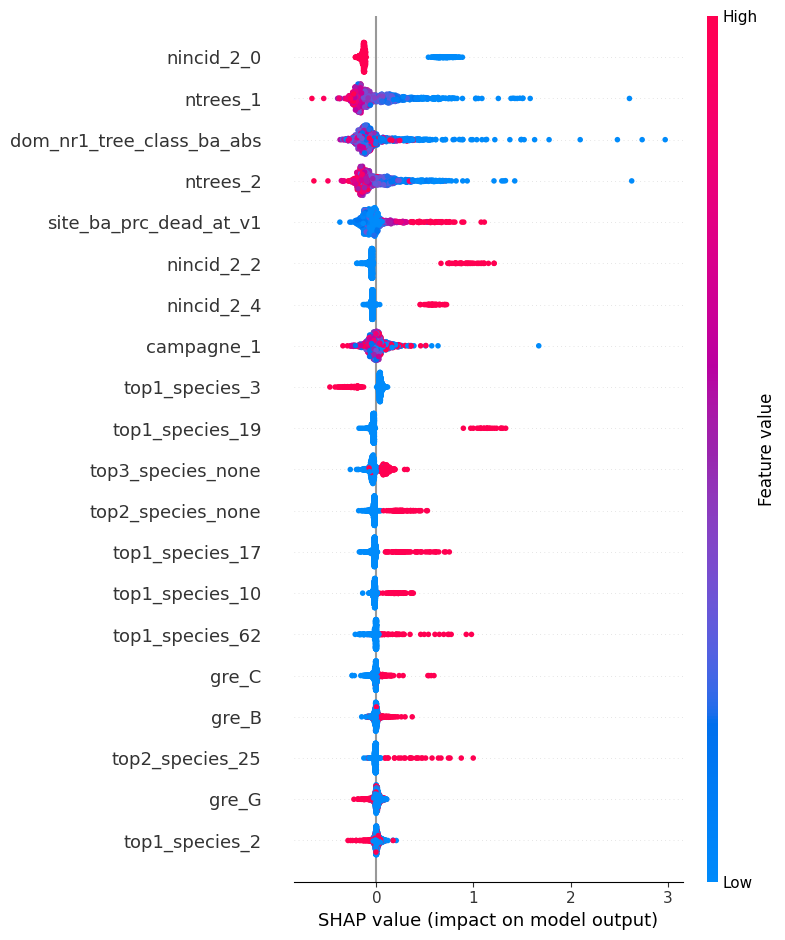

In [6]:
shap.summary_plot(shap_values, X_test)